In [90]:
%reload_ext autoreload
%autoreload 2

##### Define ChEMBL and Papyrus versions

In [91]:
chembl_version = '31'
papyrus_version = '05.5'
papyrus_flavor = 'nostereo'

##### Define annotation round

In [92]:
annotation_round = 2

##### Define protein for analysis

In [93]:
analysis_accession = 'P00533'

##### Define output directory

In [94]:
from utils import *
directories_file = './directories.json'

In [95]:
accession_analysis_dir = get_mutant_analysis_path(directories_file, 'accession', annotation_round)
common_analysis_dir = get_mutant_analysis_path(directories_file, 'common', annotation_round)
compound_analysis_dir = get_mutant_analysis_path(directories_file, 'compound', annotation_round)
bioactivity_analysis_dir = get_mutant_analysis_path(directories_file, 'bioactivity', annotation_round)

##### Import analysis functions

In [96]:
# Import project path to allow for relative imports
import project_path

import os
import pandas as pd

In [97]:
from preprocessing import merge_chembl_papyrus_mutants
from mutant_analysis_accession import filter_accession_data
from mutant_analysis_common_subsets import compute_variant_activity_distribution,read_common_subset_stats_file,\
    plot_bubble_bioactivity_distribution_stats,calculate_accession_common_subset_stats
from mutant_analysis_compounds import plot_bioactivity_distribution_cluster_subset,get_clustering_stats,butina_cluster_compounds
from mutant_analysis_accession import get_statistics_across_variants

#### Check the statistics of the different types of common subsets

For this analysis, make sure to have run beforehand /analysis/main.py script to compute common subsets for all
accessions and be able to read the statistics files.

In [98]:
# Obtain mutant annotated bioactivity data
annotated_data = merge_chembl_papyrus_mutants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000, annotation_round)

##### Check targets where a strict common subset is possible

In [99]:
# Calculate statistics per variant (full set)
stats_variant = get_statistics_across_variants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000,
                                               annotation_round, accession_analysis_dir,save=False)
# Read statistics for strict common subset
strict_subset_stats = read_common_subset_stats_file(common_analysis_dir,
                              common=True,
                              sim=False,
                              sim_thres=None,
                              threshold=None, # Triggers strict common subset
                              variant_coverage=None)

In [100]:
# Enrich common subset stats with variant stats from the full set
calculate_accession_common_subset_stats(strict_subset_stats, stats_variant, aggregate=False)

,accession,variant,mean_pchembl,std_pchembl,mean_error,mean_error_strict,std_error_strict,n_accession,n_target_id,coverage,...,l1,l2,l3,l4,l5,Organism,HGNC_symbol,connectivity_variant_percentage,variant_order,connectivity_variant_fold
0,A0A045ISB3,A0A045ISB3_WT,8.242500,0.357689,0.0000,0.0000,0.000000,4,4,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,93.869732,1,1.000000
1,A0A045ISB3,A0A045ISB3_F161S,5.127500,0.102103,-3.1150,-3.1150,0.317779,4,4,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,2,61.250000
2,A0A045ISB3,A0A045ISB3_I203A,7.512500,0.151300,-0.7300,-0.7300,0.216910,4,4,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,3,61.250000
3,A0A045ISB3,A0A045ISB3_I207A,6.917500,0.192592,-1.3250,-1.3250,0.177904,4,4,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,5,61.250000
4,A0A045ISB3,A0A045ISB3_I207K,6.240000,0.127802,-2.0025,-2.0025,0.357829,4,4,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,4,61.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Q9WKE8,Q9WKE8_K103N,7.056667,1.563972,NaN,NaN,0.000000,3,3,1.0,...,Enzyme,Other,Other,Other,Other,Human immunodeficiency virus 1,NaN,19.819820,1,1.000000
421,Q9WKE8,Q9WKE8_V106A_F227L,6.370000,1.255747,NaN,NaN,0.000000,3,3,1.0,...,Enzyme,Other,Other,Other,Other,Human immunodeficiency virus 1,NaN,13.513514,5,1.466667
422,Q9WKE8,Q9WKE8_E138K,7.633333,0.757204,NaN,NaN,0.000000,3,3,1.0,...,Enzyme,Other,Other,Other,Other,Human immunodeficiency virus 1,NaN,19.819820,2,1.000000
423,Q9WKE8,Q9WKE8_Y181C,7.140000,1.701147,NaN,NaN,0.000000,3,3,1.0,...,Enzyme,Other,Other,Other,Other,Human immunodeficiency virus 1,NaN,9.009009,6,2.200000


In [101]:
# Check how many proteins had a common subset, and how many variants there were
strict_subset_stats_agg = calculate_accession_common_subset_stats(strict_subset_stats, stats_variant, aggregate=True)
strict_subset_stats_agg

,variant_count,undefined_mutants,common_subset_size,accession_set_size,common_subset_ratio,accession_mutant_ratio,l1,l2,l3,l4,Organism,HGNC_symbol
accession,,,,,,,,,,,,
A0A045ISB3,5,False,4,261,1.532567,6.130268,Enzyme,Hydrolase,Other,Other,Mycobacterium tuberculosis,NaN
A4TVL0,2,False,3,25,12.000000,12.000000,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN
A5Z252,2,True,2,62,3.225806,17.741935,Enzyme,Hydrolase,Other,Other,Influenza A virus (A/Turkey/651242/2006(H5N1)),NaN
B4URF0,3,True,3,595,0.504202,7.058824,Enzyme,Hydrolase,Other,Other,Influenza A virus (strain A/Wilson-Smith/1933 ...,NaN
B7UPE2,2,False,3,7,42.857143,100.000000,Enzyme,Transferase,Other,Other,Escherichia coli O127:H6 (strain E2348/69 / EPEC),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Q9NUW8,2,False,8,12034,0.066478,0.066478,Enzyme,Phosphodiesterase,Other,Other,Homo sapiens (Human),TDP1
Q9P2K8,2,False,7,94,7.446809,60.638298,Enzyme,Kinase,Protein Kinase,Other protein kinase group,Homo sapiens (Human),EIF2AK4
Q9UDY8,2,False,4,195,2.051282,2.051282,Enzyme,Hydrolase,Other,Other,Homo sapiens (Human),NaN


In [102]:
# Check distribution of the size of common subsets
strict_subset_stats_agg[['common_subset_size','variant_count','common_subset_ratio']].describe()

,common_subset_size,variant_count,common_subset_ratio
count,114.000000,114.000000,114.000000
mean,9.877193,3.728070,4.980614
std,33.144132,6.829511,9.182522
min,2.000000,2.000000,0.002659
25%,2.000000,2.000000,0.326005
50%,3.500000,2.000000,1.167705
75%,7.000000,3.750000,4.766111
max,346.000000,71.000000,50.000000


##### Compounds tested on at least 2 variants. Variant coverage of 20%

In [103]:
# Read statistics for common subset
common_subset_20_stats = read_common_subset_stats_file(common_analysis_dir,
                              common=True,
                              sim=False,
                              sim_thres=None,
                              threshold=2, # Tested on at least 2 variants
                              variant_coverage=0.2) # variant coverage 20%
# Check how many proteins had a common subset, and how many variants there were
common_subset_20_stats_agg = calculate_accession_common_subset_stats(common_subset_20_stats, stats_variant,
                                                                   aggregate=True)
common_subset_20_stats_agg

,variant_count,undefined_mutants,common_subset_size,accession_set_size,common_subset_ratio,accession_mutant_ratio,l1,l2,l3,l4,Organism,HGNC_symbol
accession,,,,,,,,,,,,
A0A045ISB3,5,False,4,261,1.532567,6.130268,Enzyme,Hydrolase,Other,Other,Mycobacterium tuberculosis,NaN
A3EZI9,3,False,30,794,3.778338,15.239295,Enzyme,Protease,Serine protease,Serine protease PA clan,Hepacivirus C,NaN
A3EZJ3,17,False,8,783,1.021711,4.725415,Other,Other,Other,Other,Hepacivirus C,NaN
A4TVL0,2,False,3,25,12.000000,12.000000,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN
A5Z252,2,True,2,62,3.225806,17.741935,Enzyme,Hydrolase,Other,Other,Influenza A virus (A/Turkey/651242/2006(H5N1)),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Q9UM07,5,False,4,57,7.017544,26.315789,Enzyme,Other,Other,Other,Homo sapiens (Human),PADI4
Q9UM73,3,False,357,2599,13.736052,24.932666,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,Homo sapiens (Human),ALK
Q9WKE8,6,False,22,111,19.819820,100.000000,Enzyme,Other,Other,Other,Human immunodeficiency virus 1,NaN


In [104]:
# Check distribution of the size of common subsets
common_subset_20_stats_agg[['common_subset_size','variant_count','common_subset_ratio']].describe()

,common_subset_size,variant_count,common_subset_ratio
count,229.000000,229.000000,229.000000
mean,35.489083,4.751092,5.395486
std,121.066736,6.340075,8.655736
min,2.000000,2.000000,0.002659
25%,3.000000,2.000000,0.412201
50%,6.000000,3.000000,1.421991
75%,18.000000,5.000000,6.329114
max,1222.000000,71.000000,50.000000


##### Compounds tested on at least 2 variants. Variant coverage of 20% (including similarity threshold of 80%)

In [105]:
# Read statistics for common subset
common_subset_2080_stats = read_common_subset_stats_file(common_analysis_dir,
                              common=True,
                              sim=True,
                              sim_thres=0.8,
                              threshold=2, # Tested on at least 2 variants
                              variant_coverage=0.2) # variant coverage 20%
# Check how many proteins had a common subset, and how many variants there were
common_subset_2080_stats_agg = calculate_accession_common_subset_stats(common_subset_2080_stats, stats_variant,
                                                                 aggregate=True)
common_subset_2080_stats_agg

,variant_count,undefined_mutants,common_subset_size,accession_set_size,common_subset_ratio,accession_mutant_ratio,l1,l2,l3,l4,Organism,HGNC_symbol
accession,,,,,,,,,,,,
A0A045ISB3,5,False,4,261,1.532567,6.130268,Enzyme,Hydrolase,Other,Other,Mycobacterium tuberculosis,NaN
A3EZI9,3,False,31,794,3.904282,15.239295,Enzyme,Protease,Serine protease,Serine protease PA clan,Hepacivirus C,NaN
A3EZJ3,17,False,8,783,1.021711,4.725415,Other,Other,Other,Other,Hepacivirus C,NaN
A4TVL0,2,False,3,25,12.000000,12.000000,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN
A5Z252,2,True,2,62,3.225806,17.741935,Enzyme,Hydrolase,Other,Other,Influenza A virus (A/Turkey/651242/2006(H5N1)),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Q9UM07,5,False,5,57,8.771930,26.315789,Enzyme,Other,Other,Other,Homo sapiens (Human),PADI4
Q9UM73,3,False,357,2599,13.736052,24.932666,Enzyme,Kinase,Protein Kinase,TKL protein kinase group,Homo sapiens (Human),ALK
Q9WKE8,6,False,22,111,19.819820,100.000000,Enzyme,Other,Other,Other,Human immunodeficiency virus 1,NaN


In [106]:
# Check distribution of the size of common subsets
common_subset_2080_stats_agg[['common_subset_size','variant_count','common_subset_ratio']].describe()

,common_subset_size,variant_count,common_subset_ratio
count,233.000000,233.000000,233.000000
mean,35.167382,4.605150,5.389669
std,120.292647,5.884548,8.606390
min,2.000000,2.000000,0.002659
25%,3.000000,2.000000,0.424448
50%,6.000000,3.000000,1.437372
75%,16.000000,5.000000,6.265876
max,1225.000000,71.000000,50.000000


#### Plot bioactivity distribution for common subsets for target of interest

##### All datapoints

P00533 done.


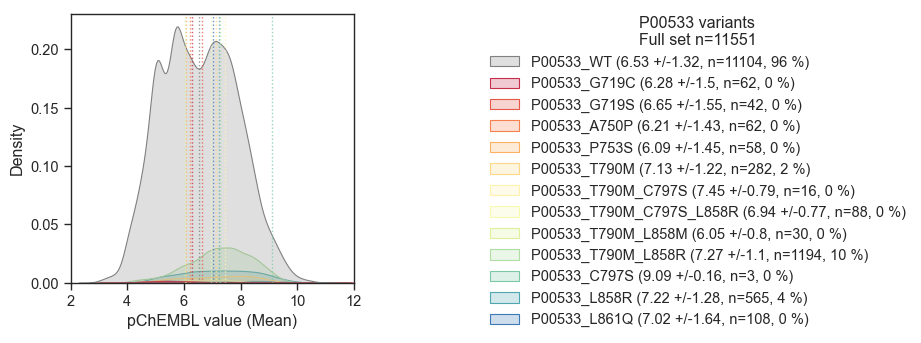

In [107]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=False, sim=False, sim_thres=None,
                                      threshold=None, variant_coverage=None, plot=True, hist=False, plot_mean=True,
                                      color_palette=None, save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

##### Compounds tested on at least 2 variants

P00533 done.


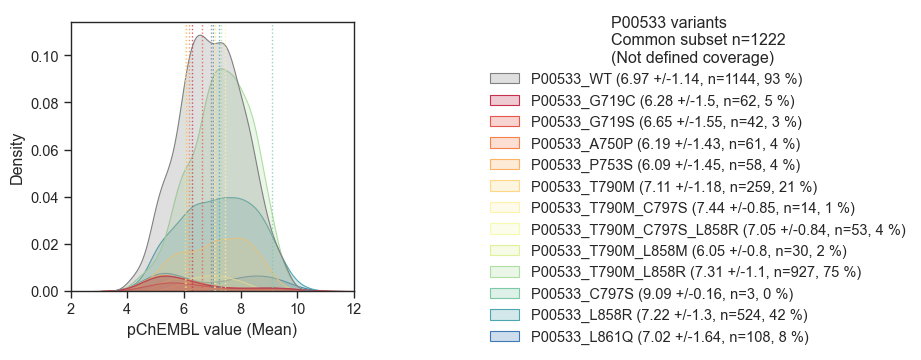

In [108]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=False, sim_thres=None,
                                      threshold=2, variant_coverage=None, plot=True, hist=False,
                                      plot_mean=True, color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

##### Compounds tested on at least 2 variants. Variant coverage of 1%

P00533 done.


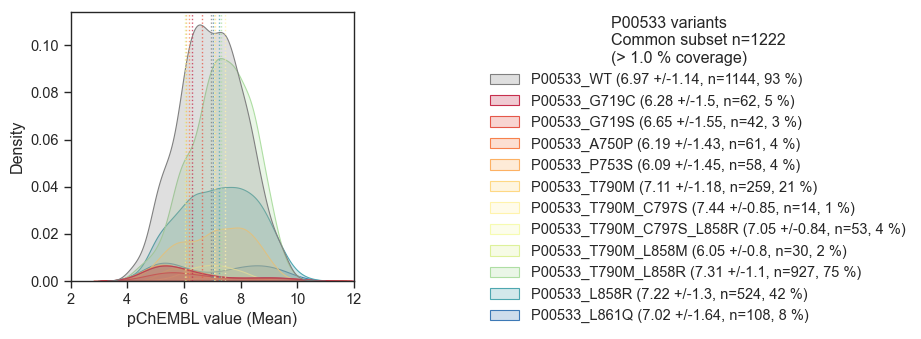

In [109]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=False, sim_thres=None,
                                      threshold=2, variant_coverage=0.01, plot=True, hist=False,
                                      plot_mean=True, color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

##### Compounds tested on at least 2 variants. Variant coverage of 20%

P00533 done.


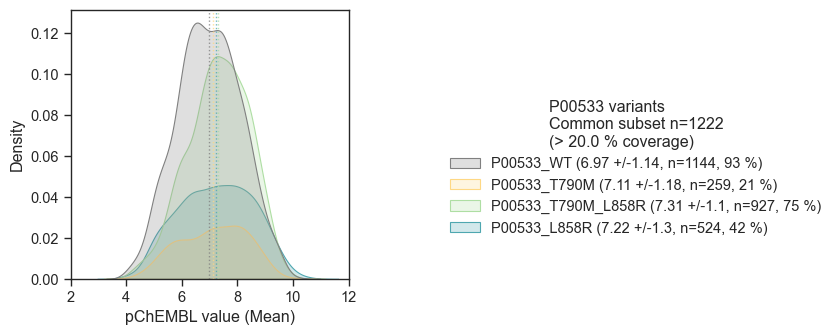

In [110]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=False, sim_thres=None,
                                      threshold=2, variant_coverage=0.2, plot=True, hist=False,
                                      plot_mean=True, color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

##### Compounds tested on at least 2 variants. Variant coverage of 20% (including similarity threshold of 80%)

P00533 done.


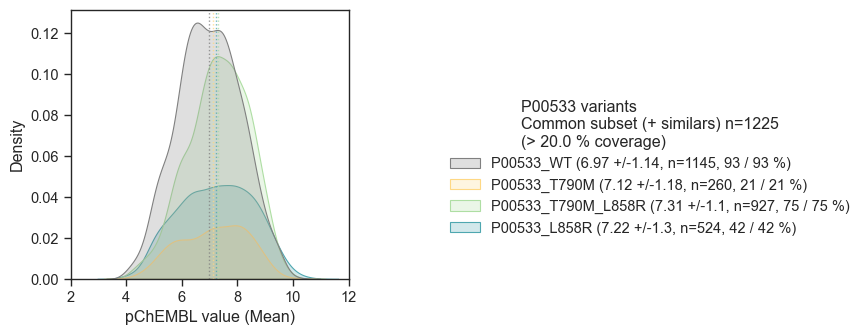

In [111]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=True, sim_thres=0.8,
                                      threshold=2, variant_coverage=0.2, plot=True, hist=False,
                                      plot_mean=True,color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir,
                                      replot=True)

##### Plot bioactivity distribution summary across different types of subsets

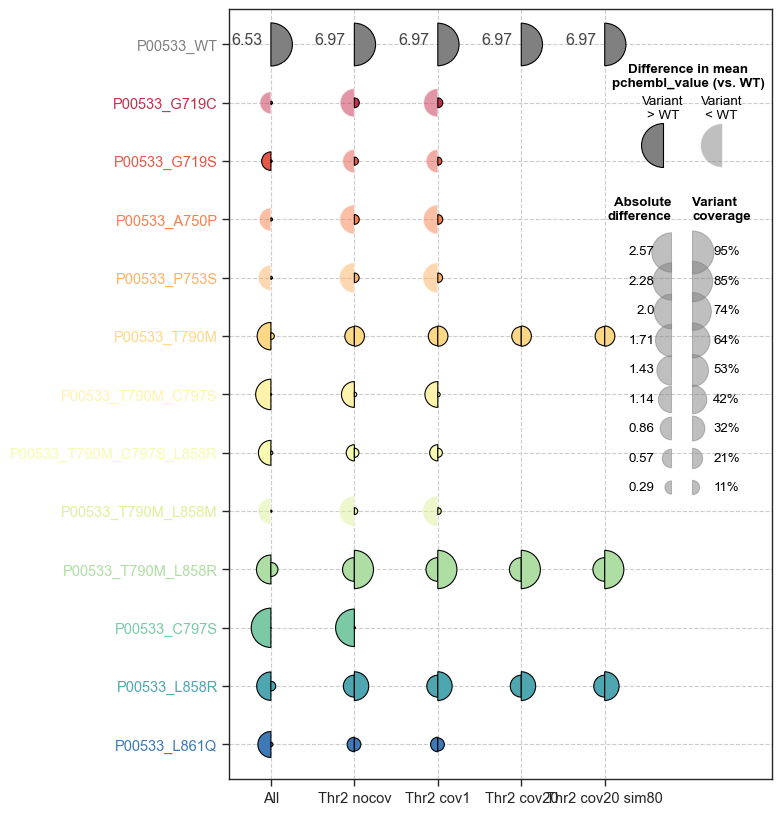

In [112]:
plot_bubble_bioactivity_distribution_stats(common_analysis_dir, 'common_subsets', analysis_accession, 'mean_error',
                                           bioactivity_analysis_dir)

#### Plot bioactivity distribution for top 10 Butina clusters

Loaded 1222 clusters for P00533
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.


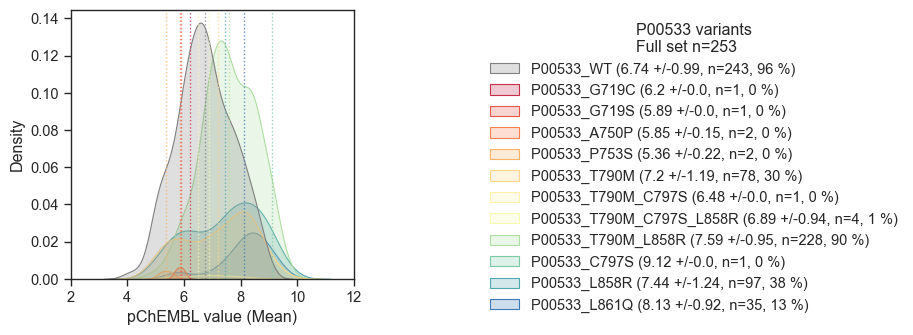

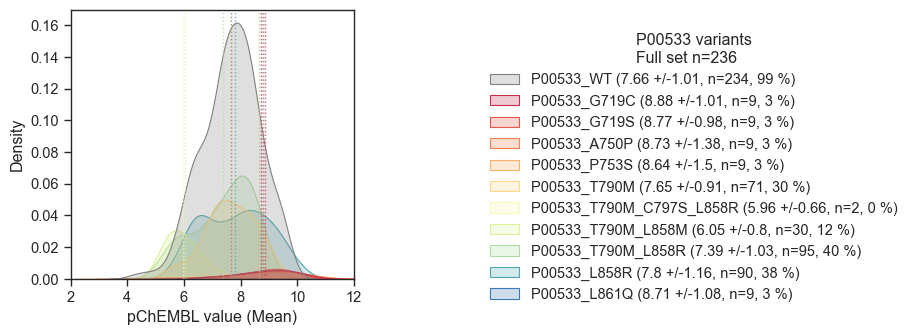

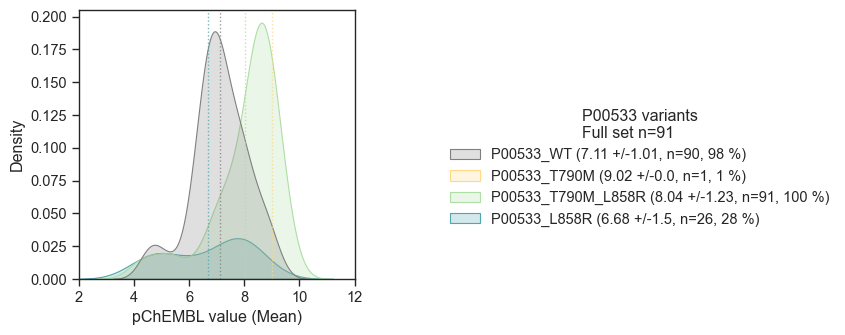

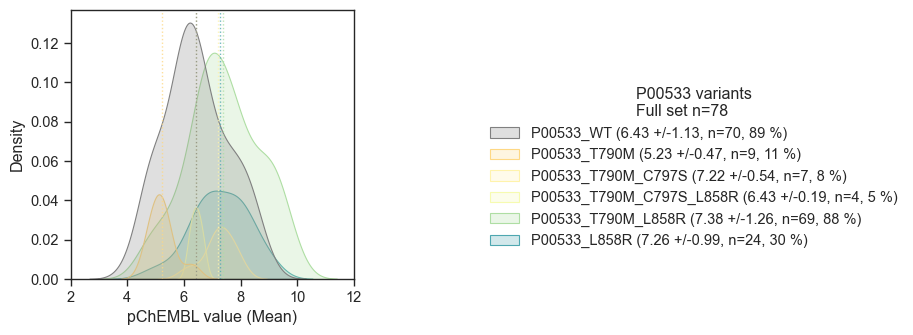

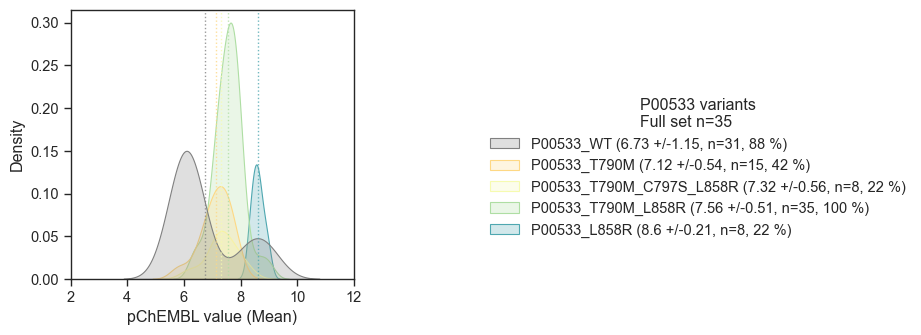

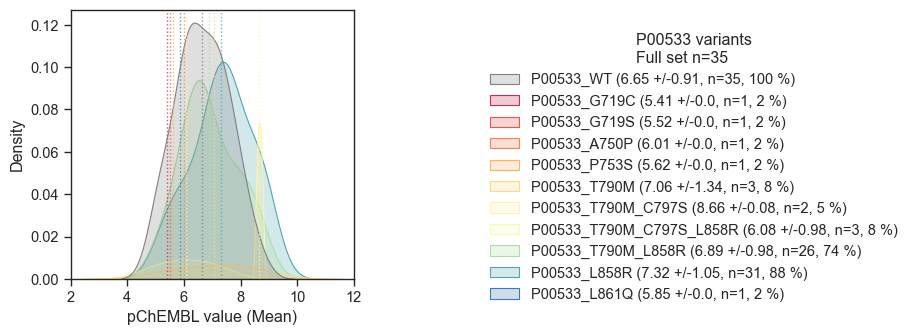

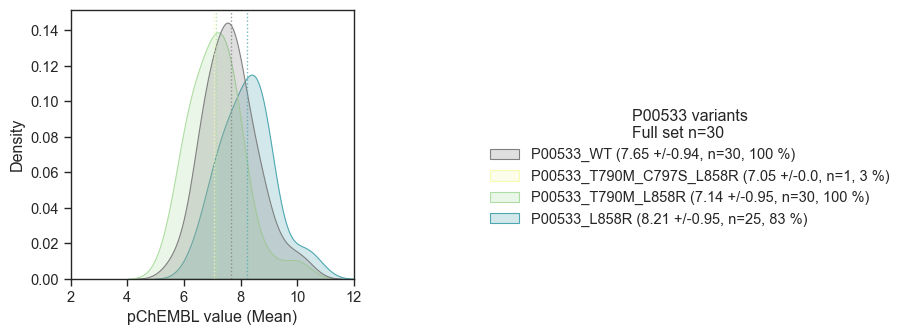

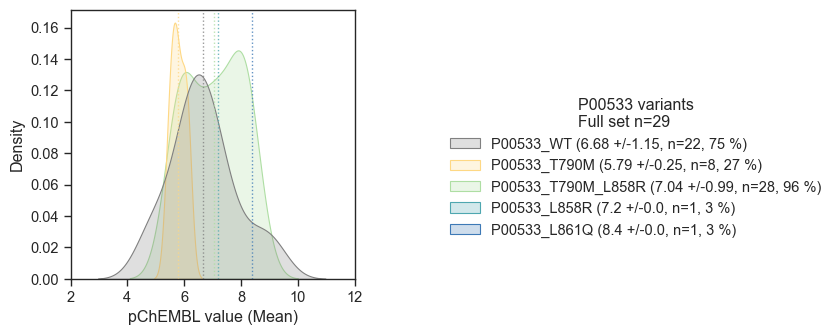

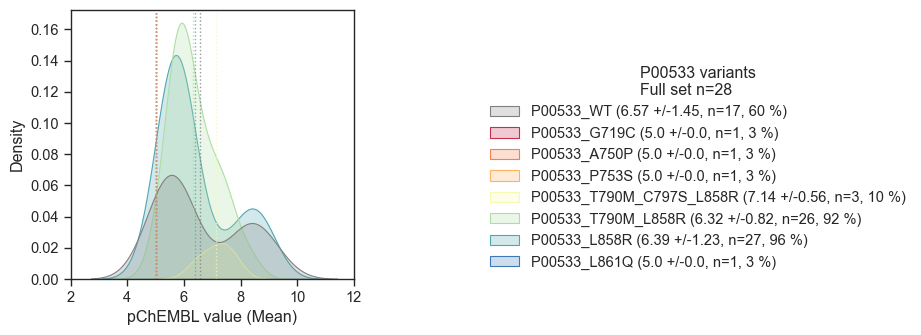

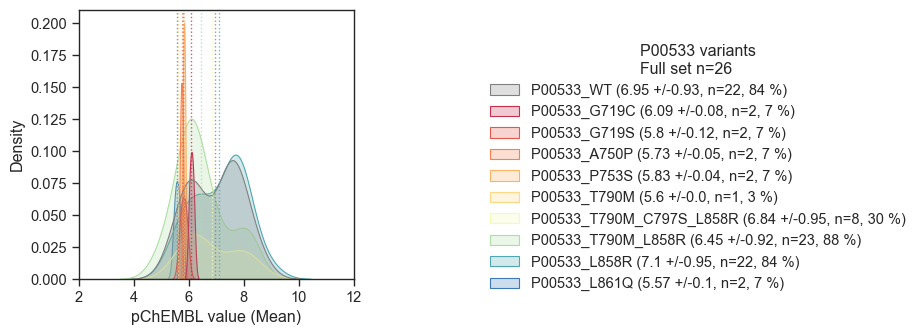

In [113]:
plot_bioactivity_distribution_cluster_subset(analysis_accession, annotation_round, compound_analysis_dir, replot=True)

In [114]:
get_clustering_stats(analysis_accession, compound_analysis_dir, 'full_set', '0.5')

Number of clusters: 120
Number of compounds in clusters: 1222
Number of compounds per cluster:
Cluster 1: 253 compounds
Cluster 2: 236 compounds
Cluster 3: 91 compounds
Cluster 4: 78 compounds
Cluster 5: 35 compounds
Cluster 6: 35 compounds
Cluster 7: 30 compounds
Cluster 8: 29 compounds
Cluster 9: 28 compounds
Cluster 10: 26 compounds
Cluster 11: 24 compounds
Cluster 12: 23 compounds
Cluster 13: 20 compounds
Cluster 14: 20 compounds
Cluster 15: 19 compounds
Cluster 16: 19 compounds
Cluster 17: 16 compounds
Cluster 18: 13 compounds
Cluster 19: 12 compounds
Cluster 20: 12 compounds
Cluster 21: 11 compounds
Cluster 22: 10 compounds
Cluster 23: 7 compounds
Cluster 24: 6 compounds
Cluster 25: 6 compounds
Cluster 26: 5 compounds
Cluster 27: 5 compounds
Cluster 28: 5 compounds
Cluster 29: 5 compounds
Cluster 30: 4 compounds
Cluster 31: 4 compounds
Cluster 32: 4 compounds
Cluster 33: 4 compounds
Cluster 34: 4 compounds
Cluster 35: 4 compounds
Cluster 36: 4 compounds
Cluster 37: 4 compounds
Cl

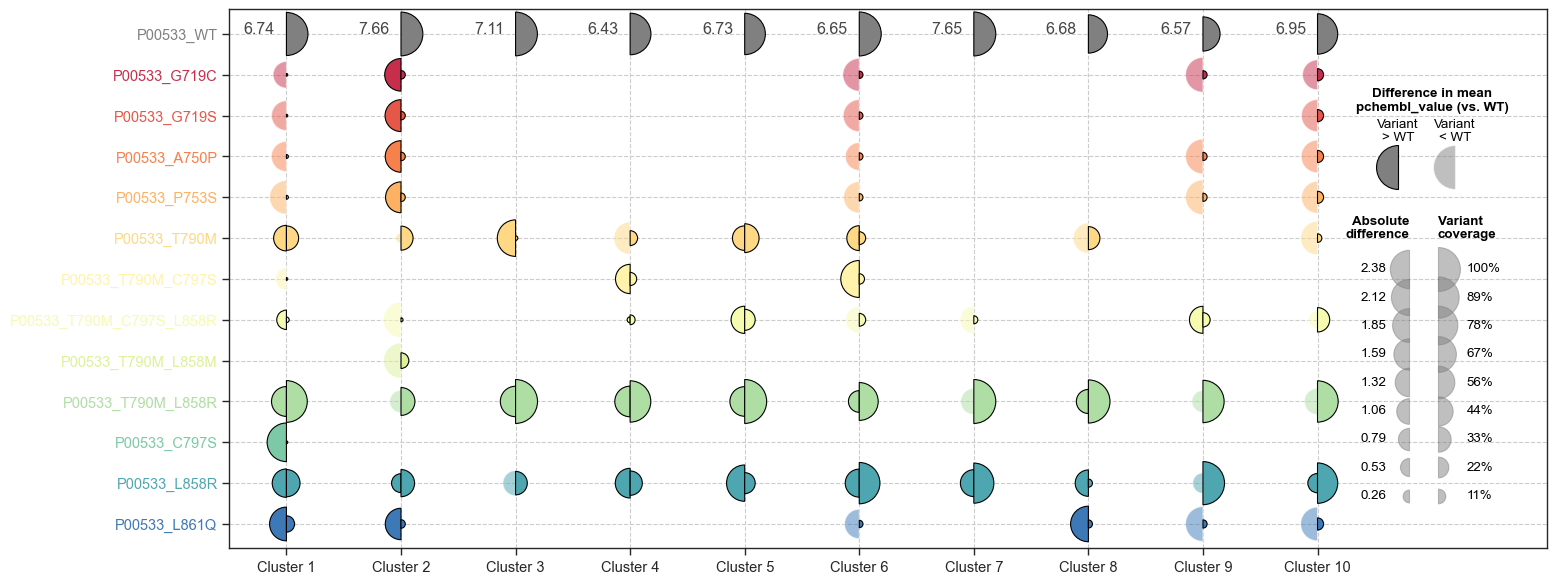

In [115]:
plot_bubble_bioactivity_distribution_stats(compound_analysis_dir,
                                           'butina_clusters',
                                           analysis_accession, 'mean_error',bioactivity_analysis_dir)